# 23MCA0131
# Srijan Dutta
Here we aim to find the loan application status of a given candidate based on given dataset. 

First we import all the necessary modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Now we read the dataset that is to be analyzed and make predictions from

In [2]:
df = pd.read_csv('loan_data_1.csv')

In [3]:
# Checking the size of the dataset
df.shape

(381, 14)

In [4]:
# Now we see about the features of the data
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
df.head(8)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
5,5,LP001024,Male,Yes,2,Graduate,No,3200.0,700.0,70.0,360.0,1.0,Urban,Y
6,6,LP001027,Male,Yes,2,Graduate,NaN,2500.0,1840.0,109.0,360.0,1.0,Urban,Y
7,7,LP001029,Male,No,0,Graduate,No,1853.0,2840.0,114.0,360.0,1.0,Rural,N


This data consists of a few categorical values that needs to be converted. Apart from that we see that we have two columns that are not required for the analysis of the data so we drop them.

In [6]:
df.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)

We convert the rest

In [7]:
# Converting String Categorical Values to Numeric Values
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]
    
# Replace "3+" with 3 in the Dependents column
df['Dependents'] = df['Dependents'].replace('3+', 3)

# Convert the Dependents column to numeric data type
df['Dependents'] = pd.to_numeric(df['Dependents'])


Then we check for each columns if they have any NaN values and we find to have a few. So we replace them with the mean values of that column

In [8]:
df.isna().sum()

Gender                0
Married               0
Dependents            8
Education             0
Self_Employed         0
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
mean_values = df.mean()

# Fill NaN values with the mean for each column
df['Dependents'].fillna(mean_values['Dependents'], inplace=True)
df['ApplicantIncome'].fillna(mean_values['ApplicantIncome'], inplace=True)
df['CoapplicantIncome'].fillna(mean_values['CoapplicantIncome'], inplace=True)
df['LoanAmount'].fillna(mean_values['LoanAmount'], inplace=True)
df['Loan_Amount_Term'].fillna(mean_values['Loan_Amount_Term'], inplace=True)
df['Credit_History'].fillna(mean_values['Credit_History'], inplace=True)

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'])


C:\Users\srija\AppData\Local\Temp\ipykernel_27960\2065130315.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(mean_values['Dependents'], inplace=True)
C:\Users\srija\AppData\Local\Temp\ipykernel_27960\2065130315.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,1.0,0,0,128.0,360.0,1.0,0,0,6091.000000
1,0,0,0.0,0,1,66.0,360.0,1.0,1,1,3000.000000
2,0,0,0.0,1,0,120.0,360.0,1.0,1,1,4941.000000
3,0,1,0.0,0,0,141.0,360.0,1.0,1,1,6000.000000
4,0,0,0.0,1,0,95.0,360.0,1.0,1,1,3849.000000
...,...,...,...,...,...,...,...,...,...,...,...
376,0,0,3.0,0,0,128.0,360.0,1.0,1,1,5703.000000
377,0,0,0.0,0,0,108.0,360.0,1.0,0,1,4499.005289
378,1,1,0.0,0,0,71.0,360.0,1.0,0,1,2900.000000
379,0,0,3.0,0,0,40.0,180.0,1.0,0,1,4106.000000


In [10]:
df.head()
df.to_csv('updated_loan.csv') # we save the latest dataset to preserve values

In [11]:
df.shape

(381, 13)

In [12]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.209974,0.401575,0.680965,0.249344,0.036745,3563.422764,1267.005289,104.914209,340.864865,0.837607,1.112861,0.711286,4830.428053
std,0.438904,0.490861,0.982793,0.468234,0.382119,1404.653023,2330.803149,28.183387,67.549811,0.354459,0.811346,0.453761,2416.638950
min,-1.000000,0.000000,0.000000,-1.000000,-1.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2600.000000,0.000000,90.000000,360.000000,1.000000,0.000000,0.000000,3618.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,3357.000000,1041.000000,110.000000,360.000000,1.000000,1.000000,1.000000,4547.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,4188.000000,1964.000000,127.000000,360.000000,1.000000,2.000000,1.000000,5484.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000,35673.000000


We check for the correlation heat map to check for which features are most suited for the  classification task. However we find that we get better results if we choose to take all the features in the dataset instead of the correlated data.

<bound method DataFrame.corr of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0         1.0          0              0           4583.0   
1         0        0         0.0          0              1           3000.0   
2         0        0         0.0          1              0           2583.0   
3         0        1         0.0          0              0           6000.0   
4         0        0         0.0          1              0           2333.0   
..      ...      ...         ...        ...            ...              ...   
376       0        0         3.0          0              0           5703.0   
377       0        0         0.0          0              0           3232.0   
378       1        1         0.0          0              0           2900.0   
379       0        0         3.0          0              0           4106.0   
380       1        1         0.0         -1              1           4583.0   

     CoapplicantInc

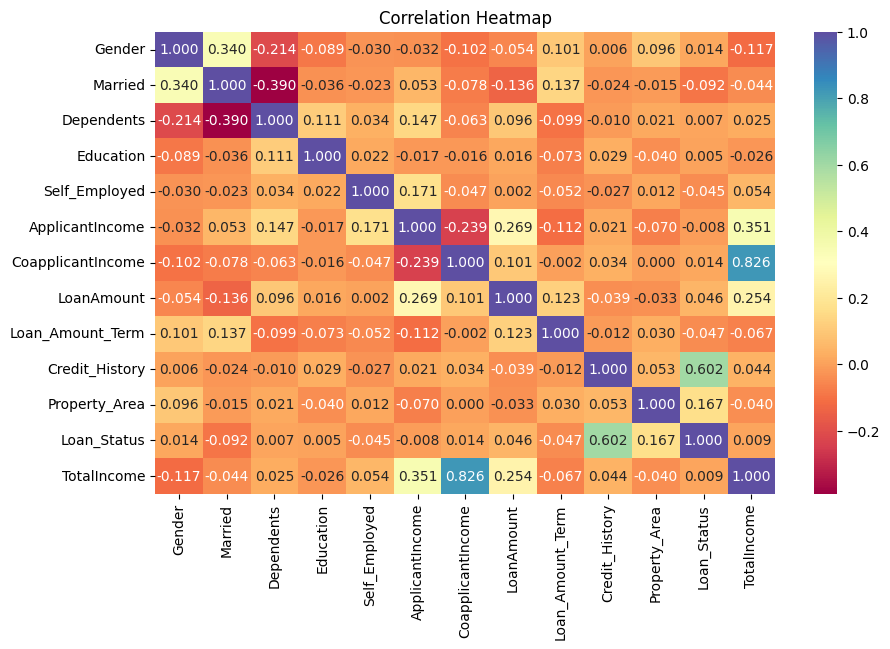

In [13]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")
print(df.corr)
show_heat_map(df)

In [14]:
# Features to be Selected
def select_features(correlation_matrix, df):
    correlation_with_target = correlation_matrix['Loan_Status'].abs().sort_values(ascending=False)
    selected_features = correlation_with_target[correlation_with_target >= 0.1].index.tolist()
    print("Selected Features:")
    print(selected_features)
corr = df.corr()
select_features(corr, df)

Selected Features:
['Loan_Status', 'Credit_History', 'Property_Area']


In [15]:
X = df.iloc[:, :-1]
y = df['Loan_Status']
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0         1.0          0              0           4583.0   
1         0        0         0.0          0              1           3000.0   
2         0        0         0.0          1              0           2583.0   
3         0        1         0.0          0              0           6000.0   
4         0        0         0.0          1              0           2333.0   
..      ...      ...         ...        ...            ...              ...   
376       0        0         3.0          0              0           5703.0   
377       0        0         0.0          0              0           3232.0   
378       1        1         0.0          0              0           2900.0   
379       0        0         3.0          0              0           4106.0   
380       1        1         0.0         -1              1           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use `StandardScaler()` to normalize the data.

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we choose all the classifier models that we need to analyze and predict the required `accuracy`, `precision`, `recall` and `F1-score`

In [18]:
classifiers = {
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (Poly)': SVC(kernel='poly', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLPC': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    
    
}
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

Fitting the model and calculating the needed metrics

In [19]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

c:\Users\srija\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
for metric_name, metric_values in metrics.items():
    print(f"{metric_name}:")
    for classifier_name, value in zip(classifiers.keys(), metric_values):
        print(f"{classifier_name}: {value:.4f}")
    print()


Accuracy:
SVM (Linear): 1.0000
SVM (Poly): 1.0000
SVM (RBF): 0.9740
SVM (Sigmoid): 1.0000
KNN: 0.8831
Decision Tree: 1.0000
MLPC: 0.9870
Naive Bayes: 1.0000

Precision:
SVM (Linear): 1.0000
SVM (Poly): 1.0000
SVM (RBF): 0.9749
SVM (Sigmoid): 1.0000
KNN: 0.8993
Decision Tree: 1.0000
MLPC: 0.9872
Naive Bayes: 1.0000

Recall:
SVM (Linear): 1.0000
SVM (Poly): 1.0000
SVM (RBF): 0.9740
SVM (Sigmoid): 1.0000
KNN: 0.8831
Decision Tree: 1.0000
MLPC: 0.9870
Naive Bayes: 1.0000

F1 Score:
SVM (Linear): 1.0000
SVM (Poly): 1.0000
SVM (RBF): 0.9736
SVM (Sigmoid): 1.0000
KNN: 0.8715
Decision Tree: 1.0000
MLPC: 0.9869
Naive Bayes: 1.0000



Plotting the values for better visualization

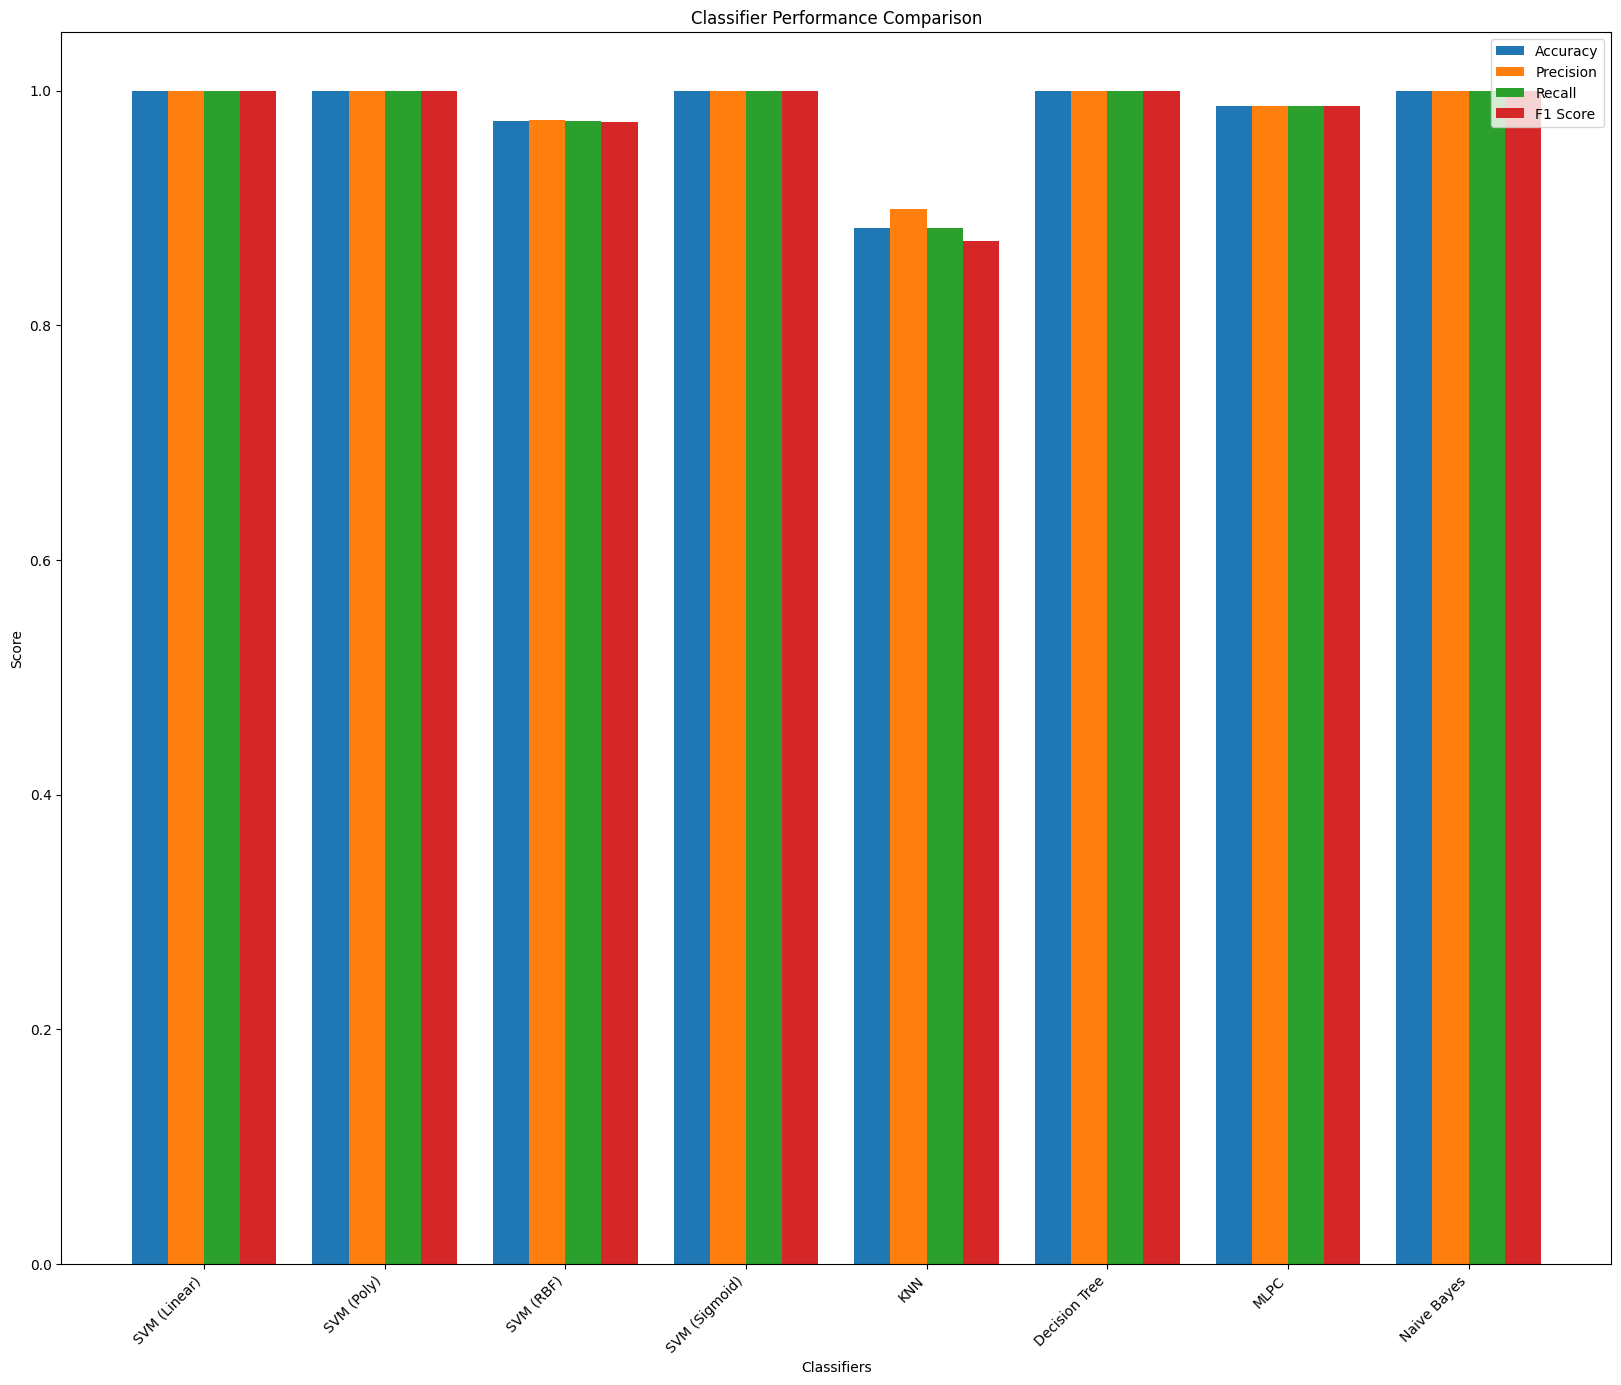

In [21]:
plt.figure(figsize=(20, 16))
bar_width = 0.2
index = np.arange(len(classifiers))

for i, (metric_name, metric_values) in enumerate(metrics.items()):
    plt.bar(index + i * bar_width, metric_values, bar_width, label=metric_name)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, classifiers.keys(), rotation=45, ha='right')
plt.legend()
plt.show()